In [1]:
import numpy as np
import GPy
import deepgp
import scipy
import sklearn
import matplotlib.pyplot as plt
import time

plt.rcParams['image.cmap'] = 'coolwarm'

warning in stationary: failed to import cython module: falling back to numpy
warning in coregionalize: failed to import cython module: falling back to numpy
warning in choleskies: failed to import cython module: falling back to numpy


## Samples from stacked GPs with different different number of layers and lengthscales

### 2 layers

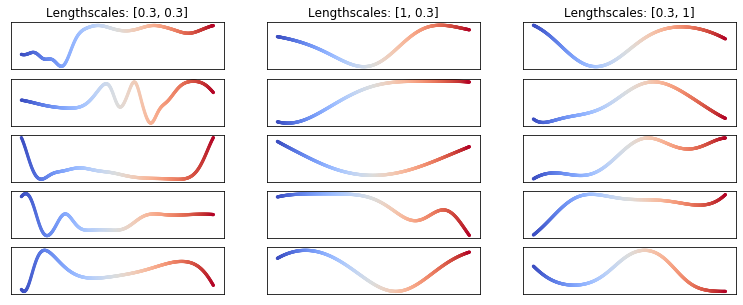

In [50]:
N = 500
np.random.seed(1)
X = np.arange(0,N).reshape(-1,1) / N
c1 = X.copy().reshape(-1,1)
kernel_lengthscales =  [[0.3, 0.3], [1, 0.3], [0.3, 1]]
samples_per_kernel = 5

fig, ax = plt.subplots(samples_per_kernel,len(kernel_lengthscales), figsize=(13,5))
for i, kls in enumerate(kernel_lengthscales):
    ax[0][i].set_title('Lengthscales: '+str(kls))
    kern1 = GPy.kern.RBF(1, variance=1, lengthscale=kls[0]) #+ GPy.kern.White(1, variance=0.0001)
    kern2 = GPy.kern.RBF(1, variance=1, lengthscale=kls[1]) #+ GPy.kern.White(1, variance=0.0001)
    for j in range (samples_per_kernel):
        f1 = np.random.multivariate_normal(mean=np.zeros(N), cov=kern1.K(X)).reshape(-1,1)
        y = np.random.multivariate_normal(mean=np.zeros(N), cov=kern2.K(f1)).reshape(-1,1)
        ax[j][i].scatter(X, y, c=c1, s=5);
        ax[j][i].set_xticks([]); ax[j][i].set_yticks([]);

### 3 layers

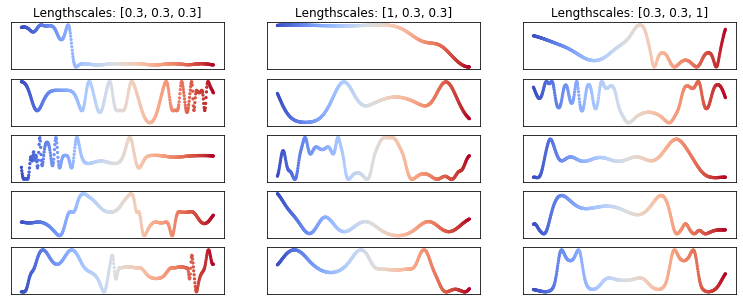

In [49]:
N = 500
np.random.seed(1)
X = np.arange(0,N).reshape(-1,1) / N
c1 = X.copy().reshape(-1,1)
kernel_lengthscales =  [[0.3, 0.3, 0.3], [1, 0.3, 0.3], [0.3, 0.3, 1]]
samples_per_kernel = 5


fig, ax = plt.subplots(samples_per_kernel,len(kernel_lengthscales), figsize=(13,5))
for i, kls in enumerate(kernel_lengthscales):
    ax[0][i].set_title('Lengthscales: '+str(kls))
    kern1 = GPy.kern.RBF(1, variance=1, lengthscale=kls[0])
    kern2 = GPy.kern.RBF(1, variance=1, lengthscale=kls[1])
    kern3 = GPy.kern.RBF(1, variance=1, lengthscale=kls[2])
    for j in range (samples_per_kernel):
        f1 = np.random.multivariate_normal(mean=np.zeros(N), cov=kern1.K(X)).reshape(-1,1)
        f2 = np.random.multivariate_normal(mean=np.zeros(N), cov=kern2.K(f1)).reshape(-1,1)
        y = np.random.multivariate_normal(mean=np.zeros(N), cov=kern3.K(f2)).reshape(-1,1)
        ax[j][i].scatter(X, y, c=c1, s=5);
        ax[j][i].set_xticks([]); ax[j][i].set_yticks([]);

### 4 layers

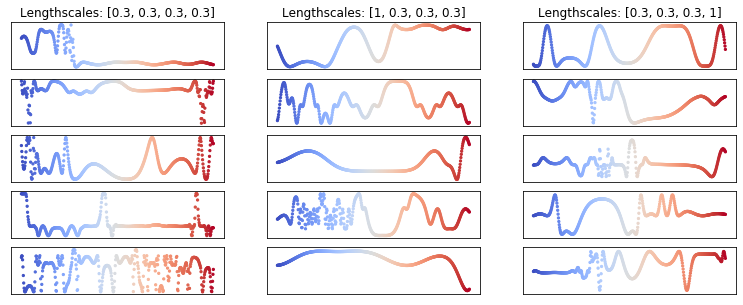

In [11]:
N = 500
np.random.seed(1)
X = np.arange(0,N).reshape(-1,1) / N
c1 = X.copy().reshape(-1,1)
kernel_lengthscales =  [[0.3, 0.3, 0.3, 0.3], [1, 0.3, 0.3, 0.3], [0.3, 0.3, 0.3, 1]]
samples_per_kernel = 5


fig, ax = plt.subplots(samples_per_kernel,len(kernel_lengthscales), figsize=(13,5))
for i, kls in enumerate(kernel_lengthscales):
    ax[0][i].set_title('Lengthscales: '+str(kls))
    kern1 = GPy.kern.RBF(1, variance=1, lengthscale=kls[0])
    kern2 = GPy.kern.RBF(1, variance=1, lengthscale=kls[1])
    kern3 = GPy.kern.RBF(1, variance=1, lengthscale=kls[2])
    kern4 = GPy.kern.RBF(1, variance=1, lengthscale=kls[3])
    for j in range (samples_per_kernel):
        f1 = np.random.multivariate_normal(mean=np.zeros(N), cov=kern1.K(X)).reshape(-1,1)
        f2 = np.random.multivariate_normal(mean=np.zeros(N), cov=kern2.K(f1)).reshape(-1,1)
        f3 = np.random.multivariate_normal(mean=np.zeros(N), cov=kern3.K(f2)).reshape(-1,1)
        y = np.random.multivariate_normal(mean=np.zeros(N), cov=kern4.K(f3)).reshape(-1,1)
        ax[j][i].scatter(X, y, c=c1, s=5);
        ax[j][i].set_xticks([]); ax[j][i].set_yticks([]);

# Analyse long term dependencys

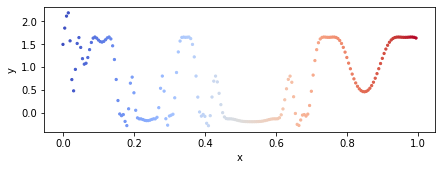

In [64]:
N = 200
np.random.seed(1)
X = np.arange(0,N).reshape(-1,1) / N
kern1 = GPy.kern.RBF(1, variance=1, lengthscale=0.3)
kern2 = GPy.kern.RBF(1, variance=1, lengthscale=0.3)
kern3 = GPy.kern.RBF(1, variance=1, lengthscale=0.3)
f1 = np.random.multivariate_normal(mean=np.zeros(N), cov=kern1.K(X)).reshape(-1,1)
f2 = np.random.multivariate_normal(mean=np.zeros(N), cov=kern2.K(f1)).reshape(-1,1)
y = np.random.multivariate_normal(mean=np.zeros(N), cov=kern3.K(f2)).reshape(-1,1)

plt.rcParams['image.cmap'] = 'coolwarm'
c1 = X.copy().reshape(-1,1)

plt.figure(figsize=(7,2.3)); plt.xlabel('x'); plt.ylabel('y')
plt.scatter(X, y, c=c1, s=5);

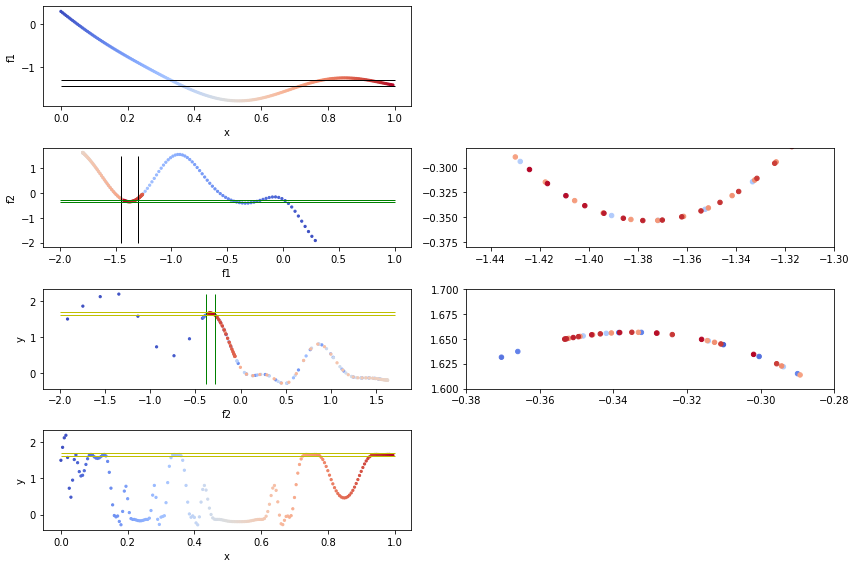

In [65]:
fig, ax = plt.subplots(4,2,figsize=(12,8))
hl1 = (-1.45,-1.3); hl1c = 'k'
ax[0][0].scatter(X, f1, c=c1, s=5); ax[0][0].hlines(hl1,0,1,linewidth=1,color=hl1c);
hl2 = (-0.38,-0.28); hl2c = 'g'
ax[1][0].scatter(f1, f2, c=c1, s=5); ax[1][0].vlines(hl1,-2,1.5,linewidth=1,color=hl1c); ax[1][0].hlines(hl2,-2,1,linewidth=1,color=hl2c);
ax[1][1].scatter(f1, f2, c=c1, s=20); ax[1][1].set_xlim(hl1);ax[1][1].set_ylim(hl2);
hl3 = (1.6,1.7); hl3c = 'y'
ax[2][0].scatter(f2, y, c=c1, s=5); ax[2][0].vlines(hl2,-0.3,2.2,linewidth=1,color=hl2c); ax[2][0].hlines(hl3,-2,1.7,linewidth=1,color=hl3c);
ax[2][1].scatter(f2, y, c=c1, s=20); ax[2][1].set_xlim(hl2);ax[2][1].set_ylim(hl3);
ax[3][0].scatter(X, y, c=c1, s=5); ax[3][0].hlines(hl3,0,1,linewidth=1,color=hl3c);

ax[0][0].set_xlabel('x'); ax[0][0].set_ylabel('f1');
ax[1][0].set_xlabel('f1'); ax[1][0].set_ylabel('f2');
ax[2][0].set_xlabel('f2'); ax[2][0].set_ylabel('y');
ax[3][0].set_xlabel('x'); ax[3][0].set_ylabel('y');

ax[0][1].axis('off')
ax[3][1].axis('off')
fig.tight_layout()

# Fit a stacked GP to synthetic data

In [235]:
import matplotlib.cm as cm
def plot_model(m, ylim=(-1.5,2)):
    x = m.X
    y = m.Y
    N = len(x)
    X = (np.arange(2*N)/N -0.5).reshape(-1,1)
    plt.figure(figsize=(10,3.2))
    plt.xlim(-0.1,1.5)
    plt.plot(X, m.predict(X)[0], c='k', label='predicted mean');
    up = (m.predict(X)[0]+2*np.sqrt(m.predict(X)[1])).reshape(-1)
    low = (m.predict(X)[0]-2*np.sqrt(m.predict(X)[1])).reshape(-1)
    plt.fill_between(X.reshape(-1), up, low, where=up>low, facecolor=[0.7, 0.7, 0.7, 0.2], label='mean +/- 2 stddev')
    plt.scatter(x, y, c=[cm.coolwarm(0.9)], s=20, label='data');
    inducing = m.layers[-1].inducing_inputs.values if isinstance(m, deepgp.DeepGP) else m.inducing_inputs
    plt.scatter(inducing, np.ones(len(inducing))*ylim[0]+0.1, color=cm.coolwarm(0.05), s=8, label='top layer inducing inputs');
    plt.xlabel('x'), plt.ylabel('y')
    plt.ylim(*ylim)
    plt.xticks([0,1]), plt.yticks([-1,0,1])
    plt.scatter([0],[0], s=0, label='log marginal likelihood: %.2f' % (m.log_likelihood()))
    plt.legend(loc='upper right')
    plt.tight_layout()



## Generate data by 3 layer stacked GP

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


([<matplotlib.axis.YTick at 0x7fb3e0c54748>,
 <a list of 3 Text yticklabel objects>)

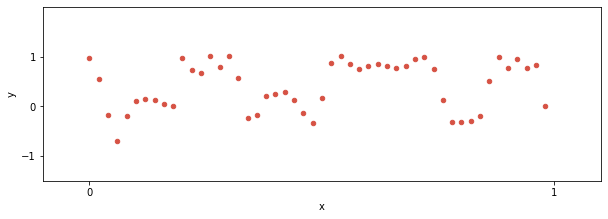

In [205]:
N = 50
np.random.seed(1)
X = np.arange(0,N).reshape(-1,1) / N
kern1 = GPy.kern.RBF(1, variance=1, lengthscale=0.2) + GPy.kern.White(1, variance=0.0001)
kern2 = GPy.kern.RBF(1, variance=1, lengthscale=0.2) + GPy.kern.White(1, variance=0.0001)
kern3 = GPy.kern.RBF(1, variance=1, lengthscale=0.5) + GPy.kern.White(1, variance=0.0001)
f1 = np.random.multivariate_normal(mean=np.zeros(N), cov=kern1.K(X)).reshape(-1,1)
f2 = np.random.multivariate_normal(mean=np.zeros(N), cov=kern2.K(f1)).reshape(-1,1)
y = np.random.multivariate_normal(mean=np.zeros(N), cov=kern3.K(f2)).reshape(-1,1)

plt.rcParams['image.cmap'] = 'coolwarm'
c1 = X.copy().reshape(-1,1)

plt.figure(figsize=(10,3.2)); plt.xlabel('x'); plt.ylabel('y')
plt.scatter(X, y, c=cm.coolwarm(0.9), s=20);
plt.xlim(-0.1,1.1)
plt.ylim(-1.5,2)
plt.xticks([0,1])
plt.yticks([-1,0,1])

## Baseline with classic GP

In [206]:
m_GP = GPy.models.SparseGPRegression(X=X, Y=y, kernel=GPy.kern.RBF(X.shape[1])+GPy.kern.Bias(X.shape[1]), num_inducing=50)
m_GP.Gaussian_noise.variance = m_GP.Y.var()*0.01
m_GP.Gaussian_noise.variance.fix()
m_GP.optimize(max_iters=100)
m_GP.Gaussian_noise.variance.unfix()
m_GP.optimize(max_iters=2000);

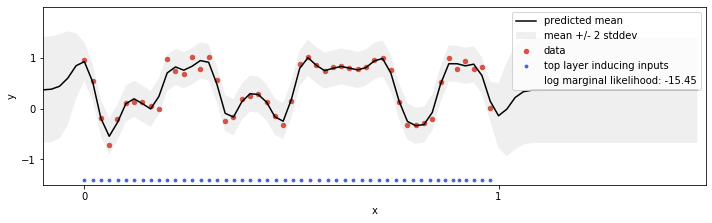

In [207]:
plot_model(m_GP)

## Fit 3 layer stacked GP

In [174]:
# Number of latent dimensions
Q = 1

# Define what kernels to use per layer
kern1 = GPy.kern.RBF(1)
kern2 = GPy.kern.RBF(1)
kern3 = GPy.kern.RBF(1)

# Number of inducing points to use
num_inducing = 50

In [175]:
m = deepgp.DeepGP([y.shape[1],Q,Q,X.shape[1]],
                  y, X, kernels=[kern1, kern2, kern3], 
                  num_inducing=num_inducing, back_constraint=False)

['Maximum number of f evaluations reached', 'Converged']


deepgp.,value,constraints,priors
obslayer.inducing inputs,"(50, 1)",,
obslayer.rbf.variance,0.4447716865998801,+ve,
obslayer.rbf.lengthscale,6.769026338621918,+ve,
obslayer.Gaussian_noise.variance,0.02227594741479527,+ve,
obslayer.Kuu_var,"(50,)",+ve,
obslayer.latent space.mean,"(50, 1)",,
obslayer.latent space.variance,"(50, 1)",+ve,
layer_1.inducing inputs,"(50, 1)",,
layer_1.rbf.variance,3.763611851356277e-43,+ve,
layer_1.rbf.lengthscale,5.5767176142229955,+ve,


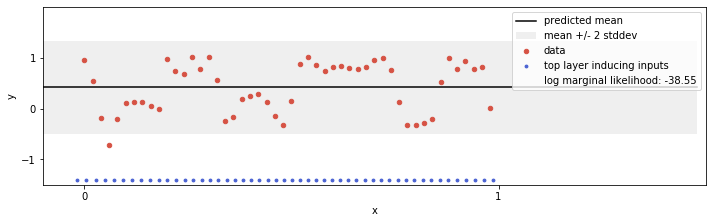

In [176]:
m.obslayer.likelihood.variance.fix(value=m.Y.var()*0.01)
m.optimize(max_iters=100)
m.obslayer.likelihood.variance.constrain_positive(warning=False)
m.optimize(max_iters=1000)
print([run.status for run in m.optimization_runs])
plot_model(m)
m

Does not work out of the box... trapped in local minima

### Use staged optimization

Use a staged optimization variant of Neil on the mnist example from  http://inverseprobability.com/talks/notes/deep-gaussian-processes.html

- Warm up with all params fixed except variational params (inducing points)
- Init lengthscale to something small enough __(additional to Neil, but crucial for convergence in this example!)__
- 

In [177]:
# Number of latent dimensions (single hidden layer, since the top layer is observed)
Q = 1

# Define what kernels to use per layer
kern1 = GPy.kern.RBF(1)
kern2 = GPy.kern.RBF(1)
kern3 = GPy.kern.RBF(1)

# Number of inducing points to use
num_inducing = 50

m = deepgp.DeepGP([y.shape[1],Q,Q,X.shape[1]],
                  y, X, kernels=[kern1, kern2, kern3], 
                  num_inducing=num_inducing, back_constraint=False)

In [178]:
# fix everything and warmup (fit variational params like inducing points)
for layer in m.layers:
    layer.kern.variance.fix(value=1, warning=False)
    layer.kern.lengthscale.fix(value=0.1, warning=False) # init lengthscale to small value
    layer.likelihood.variance.fix(value = y.var()*0.01, warning=False)

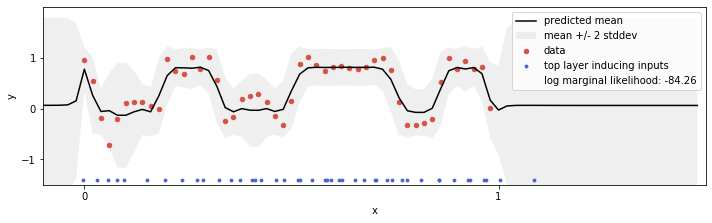

In [179]:
m.optimize(max_iters=400)
plot_model(m)

In [180]:
for layer in m.layers:
    layer.kern.variance.constrain_positive(warning=False)
    layer.kern.lengthscale.constrain_positive(warning=False)

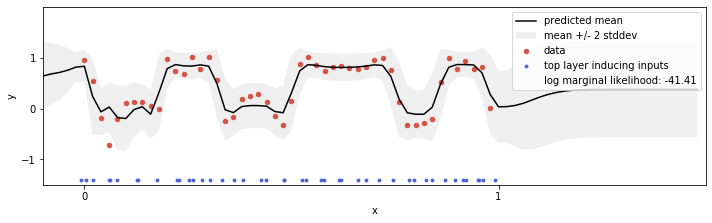

In [181]:
m.optimize(max_iters=300)
plot_model(m)

In [182]:
for layer in m.layers:
    layer.likelihood.variance.constrain_positive(warning=False)    

Maximum number of f evaluations reached


deepgp.,value,constraints,priors
obslayer.inducing inputs,"(50, 1)",,
obslayer.rbf.variance,3.6890703347100002,+ve,
obslayer.rbf.lengthscale,1.5574154757739165,+ve,
obslayer.Gaussian_noise.variance,0.0020508033565006627,+ve,
obslayer.Kuu_var,"(50,)",+ve,
obslayer.latent space.mean,"(50, 1)",,
obslayer.latent space.variance,"(50, 1)",+ve,
layer_1.inducing inputs,"(50, 1)",,
layer_1.rbf.variance,0.06853320209348857,+ve,
layer_1.rbf.lengthscale,0.5140466907164969,+ve,


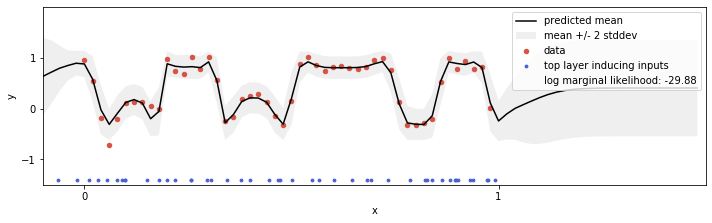

In [183]:
m.optimize(max_iters=1500)
plot_model(m)
print(m.optimization_runs[-1].status)
m

# Use only one hidden layer

In [186]:
# Number of latent dimensions (single hidden layer, since the top layer is observed)
Q = 1

# Define what kernels to use per layer
kern1 = GPy.kern.RBF(1)
kern2 = GPy.kern.RBF(1)

# Number of inducing points to use
num_inducing = 50

m = deepgp.DeepGP([y.shape[1],Q,X.shape[1]],
                  y, X, kernels=[kern1, kern2], 
                  num_inducing=num_inducing, back_constraint=False)
m

deepgp.,value,constraints,priors
obslayer.inducing inputs,"(50, 1)",,
obslayer.rbf.variance,1.0,+ve,
obslayer.rbf.lengthscale,1.0,+ve,
obslayer.Gaussian_noise.variance,1.0,+ve,
obslayer.Kuu_var,"(50,)",+ve,
obslayer.latent space.mean,"(50, 1)",,
obslayer.latent space.variance,"(50, 1)",+ve,
layer_1.inducing inputs,"(50, 1)",,
layer_1.rbf.variance,1.0,+ve,
layer_1.rbf.lengthscale,1.0,+ve,


['Maximum number of f evaluations reached', 'Converged']


deepgp.,value,constraints,priors
obslayer.inducing inputs,"(50, 1)",,
obslayer.rbf.variance,0.3973633952223466,+ve,
obslayer.rbf.lengthscale,1.1308435760295943,+ve,
obslayer.Gaussian_noise.variance,0.04170634491241202,+ve,
obslayer.Kuu_var,"(50,)",+ve,
obslayer.latent space.mean,"(50, 1)",,
obslayer.latent space.variance,"(50, 1)",+ve,
layer_1.inducing inputs,"(50, 1)",,
layer_1.rbf.variance,20.285540010103897,+ve,
layer_1.rbf.lengthscale,0.17046872706209318,+ve,


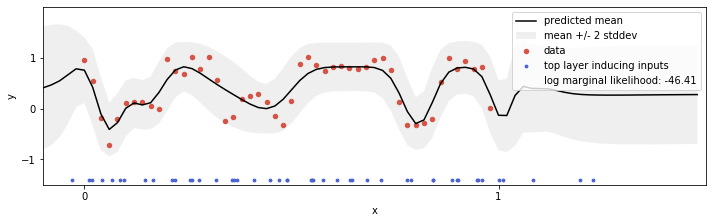

In [187]:
m.obslayer.likelihood.variance.fix(value=m.Y.var()*0.01)
m.optimize(max_iters=100)
m.obslayer.likelihood.variance.constrain_positive(warning=False)
m.optimize(max_iters=2000)
print([run.status for run in m.optimization_runs])
plot_model(m)
m

# More data

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


([<matplotlib.axis.YTick at 0x7fb3dea5d5f8>,
 <a list of 3 Text yticklabel objects>)

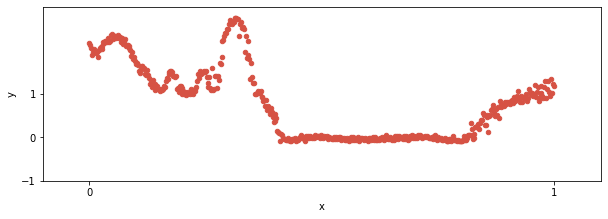

In [236]:
N = 500
num_inducing = 50
np.random.seed(1)
X = np.arange(0,N).reshape(-1,1) / N
kern1 = GPy.kern.RBF(1, variance=1, lengthscale=0.5) + GPy.kern.White(1, variance=0.0001)
kern2 = GPy.kern.RBF(1, variance=1, lengthscale=0.2) + GPy.kern.White(1, variance=0.0001)
kern3 = GPy.kern.RBF(1, variance=1, lengthscale=0.2) + GPy.kern.White(1, variance=0.0001)
f1 = np.random.multivariate_normal(mean=np.zeros(N), cov=kern1.K(X)).reshape(-1,1)
f2 = np.random.multivariate_normal(mean=np.zeros(N), cov=kern2.K(f1)).reshape(-1,1)
y = np.random.multivariate_normal(mean=np.zeros(N), cov=kern3.K(f2)).reshape(-1,1)

plt.rcParams['image.cmap'] = 'coolwarm'
c1 = X.copy().reshape(-1,1)

plt.figure(figsize=(10,3.2)); plt.xlabel('x'); plt.ylabel('y')
plt.scatter(X, y, c=cm.coolwarm(0.9), s=20);
plt.xlim(-0.1,1.1)
plt.ylim(-0.5,3)
plt.xticks([0,1])
plt.yticks([-1,0,1])

## Baseline with classic GP

Converged


sparse_gp.,value,constraints,priors
inducing inputs,"(75, 1)",,
sum.rbf.variance,0.4571363153169379,+ve,
sum.rbf.lengthscale,0.02495000306628484,+ve,
sum.bias.variance,0.6944218679187479,+ve,
Gaussian_noise.variance,0.006585805807831286,+ve,


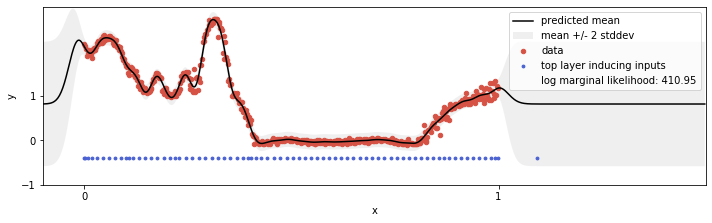

In [237]:
num_inducing = 75
m_GP = GPy.models.SparseGPRegression(X=X, Y=y, kernel=GPy.kern.RBF(X.shape[1])+GPy.kern.Bias(X.shape[1]), num_inducing=num_inducing)
m_GP.optimize(max_iters=2000);
print(m_GP.optimization_runs[-1].status)
plot_model(m_GP, ylim=(-0.5,3))
m_GP

## Fit 2 layer stacked GP

### Best effort training of all params together (no warm up)

In [238]:
# Number of latent dimensions (single hidden layer, since the top layer is observed)
Q = 1

# Define what kernels to use per layer
kern1 = GPy.kern.RBF(1)
kern2 = GPy.kern.RBF(1)

# Number of inducing points to use
num_inducing = 75

m = deepgp.DeepGP([y.shape[1],Q,X.shape[1]],
                  y, X, kernels=[kern1, kern2], 
                  num_inducing=num_inducing, back_constraint=False)

Maximum number of f evaluations reached


deepgp.,value,constraints,priors
obslayer.inducing inputs,"(75, 1)",,
obslayer.rbf.variance,2.702296755701174,+ve,
obslayer.rbf.lengthscale,1.11825705972501,+ve,
obslayer.Gaussian_noise.variance,0.0009205429135621079,+ve,
obslayer.Kuu_var,"(75,)",+ve,
obslayer.latent space.mean,"(500, 1)",,
obslayer.latent space.variance,"(500, 1)",+ve,
layer_1.inducing inputs,"(75, 1)",,
layer_1.rbf.variance,11.130463617894863,+ve,
layer_1.rbf.lengthscale,0.11794050194406615,+ve,


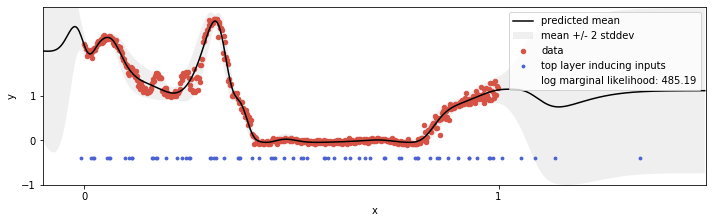

In [239]:
m.optimize(max_iters=500)
print(m.optimization_runs[-1].status)
plot_model(m, ylim=(-0.5,3))
m

### Staged optimiziation

In [240]:
# Number of latent dimensions (single hidden layer, since the top layer is observed)
Q = 1

# Define what kernels to use per layer
kern1 = GPy.kern.RBF(1)
kern2 = GPy.kern.RBF(1)

# Number of inducing points to use
num_inducing = 75

m = deepgp.DeepGP([y.shape[1],Q,X.shape[1]],
                  y, X, kernels=[kern1, kern2], 
                  num_inducing=num_inducing, back_constraint=False)
m

deepgp.,value,constraints,priors
obslayer.inducing inputs,"(75, 1)",,
obslayer.rbf.variance,1.0,+ve,
obslayer.rbf.lengthscale,1.0,+ve,
obslayer.Gaussian_noise.variance,1.0,+ve,
obslayer.Kuu_var,"(75,)",+ve,
obslayer.latent space.mean,"(500, 1)",,
obslayer.latent space.variance,"(500, 1)",+ve,
layer_1.inducing inputs,"(75, 1)",,
layer_1.rbf.variance,1.0,+ve,
layer_1.rbf.lengthscale,1.0,+ve,


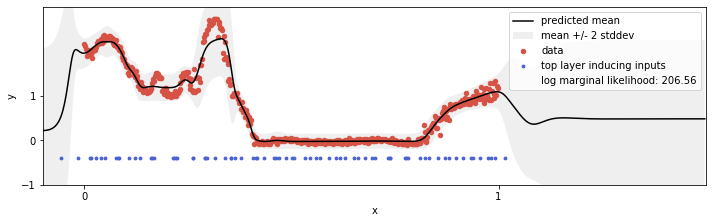

In [241]:
for layer in m.layers:
    layer.likelihood.variance.fix(value=m.Y.var()*0.01)
    layer.kern.lengthscale.fix(value=0.1)
m.optimize(max_iters=500)
plot_model(m, ylim=(-0.5,3))

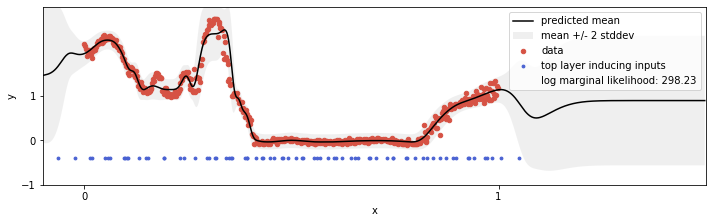

In [242]:
for layer in m.layers:
    layer.kern.lengthscale.constrain_positive(warning=False)
m.optimize(max_iters=500)
plot_model(m, ylim=(-0.5,3))

['Maximum number of f evaluations reached', 'Maximum number of f evaluations reached', 'Maximum number of f evaluations reached']


deepgp.,value,constraints,priors
obslayer.inducing inputs,"(75, 1)",,
obslayer.rbf.variance,1.4278986005805214,+ve,
obslayer.rbf.lengthscale,0.4545858835547436,+ve,
obslayer.Gaussian_noise.variance,0.0009175816666640496,+ve,
obslayer.Kuu_var,"(75,)",+ve,
obslayer.latent space.mean,"(500, 1)",,
obslayer.latent space.variance,"(500, 1)",+ve,
layer_1.inducing inputs,"(75, 1)",,
layer_1.rbf.variance,4.9761128020838825,+ve,
layer_1.rbf.lengthscale,0.06949024567779424,+ve,


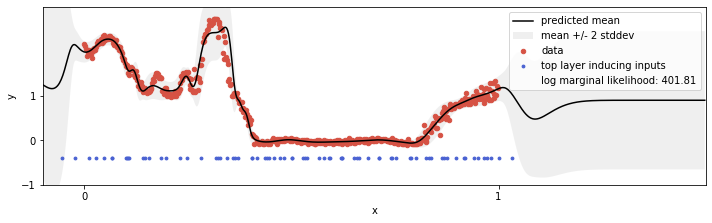

In [243]:
for layer in m.layers:
    layer.likelihood.variance.constrain_positive(warning=False)
m.optimize(max_iters=1000)
print([run.status for run in m.optimization_runs])
plot_model(m, ylim=(-0.5,3))
m

<br><br><br>
## Fit 3 layer stacked GP

### Best effort training of all params together (no warm up)

In [244]:
# Number of latent dimensions (single hidden layer, since the top layer is observed)
Q = 1

# Define what kernels to use per layer
kern1 = GPy.kern.RBF(1)
kern2 = GPy.kern.RBF(1)
kern3 = GPy.kern.RBF(1)

# Number of inducing points to use
num_inducing = 75

m = deepgp.DeepGP([y.shape[1],Q,Q,X.shape[1]],
                  y, X, kernels=[kern1, kern2, kern3], 
                  num_inducing=num_inducing, back_constraint=False)

Maximum number of f evaluations reached


deepgp.,value,constraints,priors
obslayer.inducing inputs,"(75, 1)",,
obslayer.rbf.variance,1.4410931040756518,+ve,
obslayer.rbf.lengthscale,1.794179365930315,+ve,
obslayer.Gaussian_noise.variance,0.0006265092496298139,+ve,
obslayer.Kuu_var,"(75,)",+ve,
obslayer.latent space.mean,"(500, 1)",,
obslayer.latent space.variance,"(500, 1)",+ve,
layer_1.inducing inputs,"(75, 1)",,
layer_1.rbf.variance,7.132684969787087,+ve,
layer_1.rbf.lengthscale,4.909800210946005,+ve,


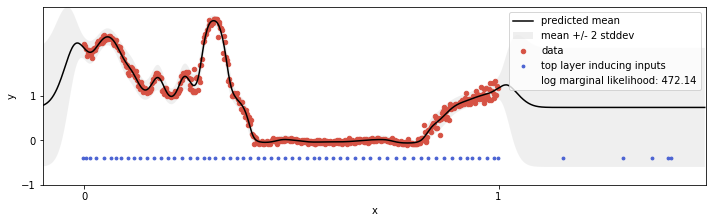

In [245]:
m.optimize(max_iters=500)
print(m.optimization_runs[-1].status)
plot_model(m, ylim=(-0.5,3))
m

### Staged optimiziation

In [246]:
# Number of latent dimensions (single hidden layer, since the top layer is observed)
Q = 1

# Define what kernels to use per layer
kern1 = GPy.kern.RBF(1)
kern2 = GPy.kern.RBF(1)
kern3 = GPy.kern.RBF(1)

# Number of inducing points to use
num_inducing = 75

m = deepgp.DeepGP([y.shape[1],Q,Q,X.shape[1]],
                  y, X, kernels=[kern1, kern2, kern3], 
                  num_inducing=num_inducing, back_constraint=False)
m

deepgp.,value,constraints,priors
obslayer.inducing inputs,"(75, 1)",,
obslayer.rbf.variance,1.0,+ve,
obslayer.rbf.lengthscale,1.0,+ve,
obslayer.Gaussian_noise.variance,1.0,+ve,
obslayer.Kuu_var,"(75,)",+ve,
obslayer.latent space.mean,"(500, 1)",,
obslayer.latent space.variance,"(500, 1)",+ve,
layer_1.inducing inputs,"(75, 1)",,
layer_1.rbf.variance,1.0,+ve,
layer_1.rbf.lengthscale,1.0,+ve,


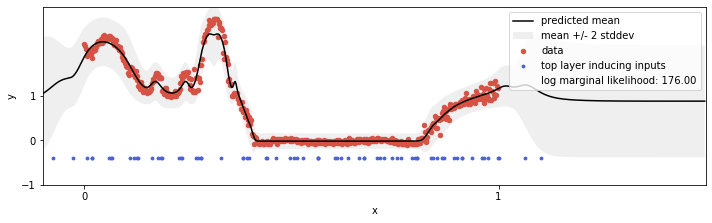

In [247]:
for layer in m.layers:
    layer.likelihood.variance.fix(value=m.Y.var()*0.01)
    layer.kern.lengthscale.fix(value=0.1)
m.optimize(max_iters=500)
plot_model(m, ylim=(-0.5,3))

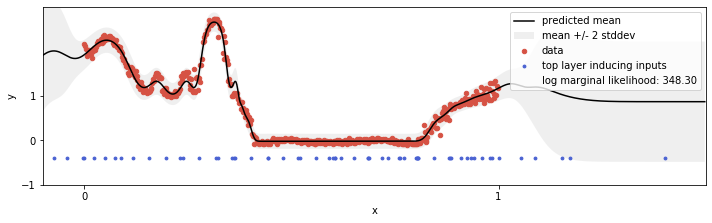

In [248]:
for layer in m.layers:
    layer.kern.lengthscale.constrain_positive(warning=False)
m.optimize(max_iters=500)
plot_model(m, ylim=(-0.5,3))

['Maximum number of f evaluations reached', 'Maximum number of f evaluations reached', 'Maximum number of f evaluations reached']


deepgp.,value,constraints,priors
obslayer.inducing inputs,"(75, 1)",,
obslayer.rbf.variance,1.4319530036647934,+ve,
obslayer.rbf.lengthscale,1.4184056681822956,+ve,
obslayer.Gaussian_noise.variance,0.0001957744566154954,+ve,
obslayer.Kuu_var,"(75,)",+ve,
obslayer.latent space.mean,"(500, 1)",,
obslayer.latent space.variance,"(500, 1)",+ve,
layer_1.inducing inputs,"(75, 1)",,
layer_1.rbf.variance,4.393891937564421,+ve,
layer_1.rbf.lengthscale,1.9987076700230952,+ve,


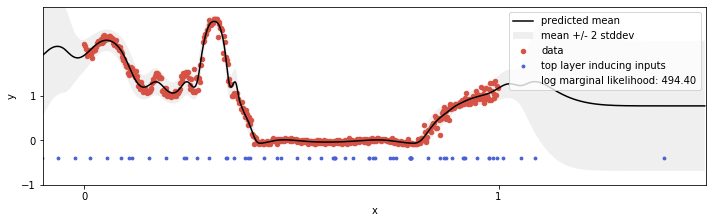

In [249]:
for layer in m.layers:
    layer.likelihood.variance.constrain_positive(warning=False)
m.optimize(max_iters=1000)
print([run.status for run in m.optimization_runs])
plot_model(m, ylim=(-0.5,3))
m